## Implementar a mano el método de Runge-Kutta-Fehlberg o RK45

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]

# Método Runge–Kutta–Fehlberg (o método de Fehlberg)
# método de orden O(h^4) con un estimador de error de orden O(h^5)

def rk45(f, t0, y0, nmax, h):
    
    # f:    función
    # t0:   tiempo inicial
    # y0:   valor inicial
    # nmax: número de iteraciones
    # h:    tamaño del paso
    
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    
    for i in range(1, nmax+1):
        
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + h*3/8, y + k1*3/32 + k2*9/32)
        k4 = h * f(t + h*12/13, y + k1*1932/2197 - k2*7200/2197 + k3*7296/2197)
        k5 = h * f(t + h, y + k1*439/216 - k2*8 + k3*3680/513 - k4*845/4104)
        k6 = h * f(t + h*1/2, y - k1*8/27 + k2*2 - k3*3544/2565 + k4*1859/4104 - k5*11/40)
        k = 16/135*k1 + 0*k2 + 6656/12825*k3 + 28561/56430*k4 - 9/50*k5 + 2/55*k6
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
        
    return [t_values, y_values]

In [3]:
from scipy import integrate  # to calculate the partial derivatives
import numdifftools as nd    # to calculate the gradient


pos = np.array([0, 0, 0])    # point charge position (electric field generator)
Q = 1.6e-19                  # [Coulombs] = [C], charge of the point charge (a proton)
k = 8.99e9                   # [N m^2 / C^2] = [(Kg m^3)/(s^4 A^2)], coulomb constant


def field_due_point_charge(r): #position where want the E field
    x, y, z = r
    
    return np.array([
        k * (x - pos[0]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # x coord
        k * (y - pos[1]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # y coord
        k * (z - pos[2]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2))  # z coord
    ])


def moment_inertia(m, l): # mass, diameter
    # I consider it as a sphere, but it can be a rod or whatever
    return 2 * m * (np.linalg.norm(l)/2)**2 / 5


def dipole_angle(t, theta):
    
    # components
    x, v = theta    # x: theta, v: omega
    E = field_due_point_charge(pos_dip) # should change when updating displacement (to do...)
    tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(x)
    a = -tau / I if I != 0 else 0  # tau is negative by the right hand rule, it goes into the page
    
    return np.array([v, a])  # velocity (omega, first derivative) and acceleration (alpha, second derivative)


def dipole_displacement(t, r):
        
        # components
        x, y, z, vx, vy, vz = r
        dE_r = dE([x, y, z])
        
        ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        ay = ( 1/m ) * (p[0] * dE_r[1][0] + p[1] * dE_r[1][1] + p[2] * dE_r[1][2])
        az = ( 1/m ) * (p[0] * dE_r[2][0] + p[1] * dE_r[2][1] + p[2] * dE_r[2][2])
        
        return np.array([vx, vy, vz, ax, ay, az])


# I'm thinking of a virus, that's why the mass, the diameter and the moment of inertia are chosen that way
    
pos_dip = np.array([6e-3, 6e-3, 0])  # dipole position (a una micra en 'x' y en 'y')
ele = 140e-9                   # [meters], distance between the two charges (virus diameter)
m = 1e-16                      # [Kg], dipole mass (virus mass), (works with m=1e-7)
q1 = 1.6e-19                   # [Coulombs], charge of each extreme of the dipole (to calculate dipole moment)
t_end = 300                    # [seconds], final time
t_start = 0                    # [seconds], initial time
fps = 30                       # frames per second, to later create an animation
theta = np.pi/3                # initial angle
omega = 0.0                    # initial angular velocity


# It works with this value, but I actually want the ones listed above
#m = 1e-7



# assuming that the center of ele is at the origin
r_pos = np.array([(ele/2)*np.cos(theta), (ele/2)*np.sin(theta), 0])    # positive charge
r_neg = np.array([-(ele/2)*np.cos(theta), -(ele/2)*np.sin(theta), 0])  # negative charge

l = r_pos - r_neg              # vector of the distance of the two charges
p = l * q1                     # dipole moment

I = moment_inertia(m, l)       # moment of inertia

E = field_due_point_charge(pos_dip)  # [V/m], electric field due to a point charge, at position 'pos_dip'

dE = nd.Gradient(field_due_point_charge) # gradient or jacobian, it is the same since it is a vector function
                                         # necessary for displacement force

# calculos para ver como son los numeros y sus ordenes de magnitud (al menos al inicio del desma)

tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(theta)
dE_r = dE(pos_dip)
ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        
print("r_pos =", r_pos)
print("r_neg =", r_neg)
print("l =", l)
print("p =", p)
print("I =", I)
print("E =", E)
print('tau =', tau)
print("alpha =", tau / I)
print("a_x =", ax)
print("------------")
print("iterations =", t_end * fps + 2)
print("[theta, omega] = ", [theta, omega])


# solution_A = integrate.solve_ivp(dipole_angle, 
#                                   [t_start, t_end], 
#                                   [theta, omega],
#                                   method='Radau',#'RK45', # con el RK45 la gráfica de la oscilación se ve mas fea
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2), # si no lo indico me da 257 puntos
#                                   #t_eval=np.linspace(t_start, t_end, 902),  # pero quiero 902 puntos evaluados
#                                   args=(I, p),
#                                   vectorized=True
#                                   #rtol=1e-9, atol=1e-12
#                                  )

solution_A = rk45(dipole_angle, 0.0, np.array([theta, omega]), t_end * fps + 2, 1/fps)


# I also want to calculate the displacement, but here it does not calculate 
# any movement, it always stays in the same position
# with some numbers if it calculates displacement in x and y
# solution_F = integrate.solve_ivp(dipole_displacement, 
#                                   [t_start, t_end], 
#                                   [pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0],
#                                   method='Radau', 
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2),
#                                   args=(p,)
#                                  )

solution_F = rk45(dipole_displacement, 0.0, np.array([pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0]), t_end * fps + 2, 1/fps)



r_pos = [3.50000000e-08 6.06217783e-08 0.00000000e+00]
r_neg = [-3.50000000e-08 -6.06217783e-08  0.00000000e+00]
l = [7.00000000e-08 1.21243557e-07 0.00000000e+00]
p = [1.1200000e-26 1.9398969e-26 0.0000000e+00]
I = 1.9600000000000001e-31
E = [1.41264221e-05 1.41264221e-05 0.00000000e+00]
tau = 3.8754829269443356e-31
alpha = 1.9772872076246608
a_x = -8.169416711861027e-13
------------
iterations = 9002
[theta, omega] =  [1.0471975511965976, 0.0]


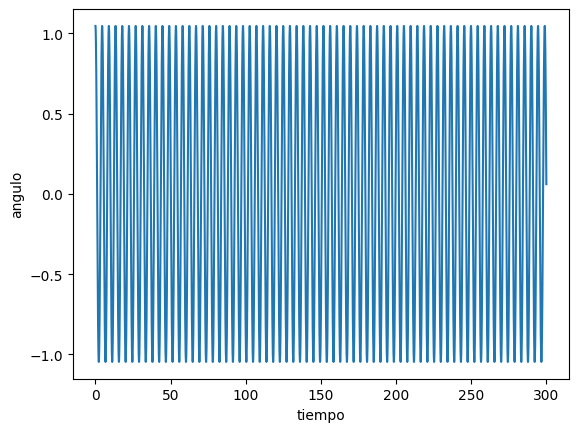

In [4]:
plt.plot(solution_A[0], [row[0] for row in solution_A[1]])
plt.xlabel('tiempo')
plt.ylabel('angulo')
plt.show()

In [5]:
[row[0] for row in solution_A[1]]

[1.0471975511965976,
 1.0460991744623975,
 1.0428054399628421,
 1.0373205489283581,
 1.0296515501361625,
 1.0198084092263437,
 1.007804104189698,
 0.9936547454561769,
 0.9773797185426205,
 0.9590018467361671,
 0.9385475707969284,
 0.9160471421641675,
 0.8915348256510908,
 0.8650491071241916,
 0.8366329011966938,
 0.8063337535378922,
 0.7742040320297184,
 0.7403011007096059,
 0.7046874702471972,
 0.667430918634705,
 0.6286045758491856,
 0.5882869664898513,
 0.5465620048212437,
 0.5035189372745267,
 0.4592522282780791,
 0.41386138630005237,
 0.36745072817497243,
 0.3201290811287952,
 0.27200942337676004,
 0.2232084657010962,
 0.17384617796834037,
 0.12404526606033058,
 0.07393060610781989,
 0.023628644170886746,
 -0.026733229449847087,
 -0.07702732131045667,
 -0.12712628089155267,
 -0.17690374104408962,
 -0.2262349423955372,
 -0.274997331795215,
 -0.3230711256717224,
 -0.3703398302299896,
 -0.4166907116822303,
 -0.46201521112985283,
 -0.5062093002318163,
 -0.5491737753480339,
 -0.5908144

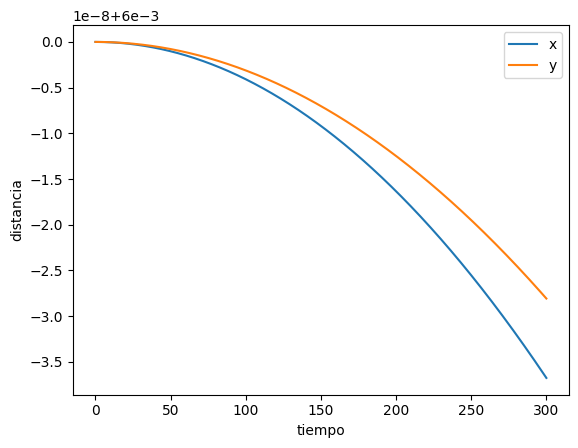

In [6]:
plt.plot(solution_F[0], [row[0] for row in solution_F[1]], label="x")
plt.plot(solution_F[0], [row[1] for row in solution_F[1]], label="y")
plt.xlabel('tiempo')
plt.ylabel('distancia')
plt.legend()
plt.show()

In [7]:
res = dipole_angle(0.0, [theta, omega])
res

array([ 0.        , -1.97728721])

In [8]:
res * (1/fps)

array([ 0.        , -0.06590957])

In [9]:
1/fps

0.03333333333333333

In [10]:
res * 4

array([ 0.        , -7.90914883])

#### Probar con los números que no puede resolver la función `solve_ivp`

In [11]:
from scipy import integrate  # to calculate the partial derivatives
import numdifftools as nd    # to calculate the gradient


pos = np.array([0, 0, 0])    # point charge position (electric field generator)
Q = 15e-5                    # [Coulombs] = [C], charge of the point charge
k = 8.99e9                   # [N m^2 / C^2] = [(Kg m^3)/(s^4 A^2)], coulomb constant


def field_due_point_charge(r): #position where want the E field
    x, y, z = r
    
    return np.array([
        k * (x - pos[0]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # x coord
        k * (y - pos[1]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # y coord
        k * (z - pos[2]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2))  # z coord
    ])


def moment_inertia(m, l): # mass, diameter
    # I consider it as a sphere, but it can be a rod or whatever
    return 2 * m * (np.linalg.norm(l)/2)**2 / 5


def dipole_angle(t, theta):
    
    # components
    x, v = theta    # x: theta, v: omega
    E = field_due_point_charge(pos_dip) # should change when updating displacement (to do...)
    tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(x)
    a = -tau / I if I != 0 else 0  # tau is negative by the right hand rule, it goes into the page
    
    return np.array([v, a])  # velocity (omega, first derivative) and acceleration (alpha, second derivative)


def dipole_displacement(t, r):
        
        # components
        x, y, z, vx, vy, vz = r
        dE_r = dE([x, y, z])
        
        ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        ay = ( 1/m ) * (p[0] * dE_r[1][0] + p[1] * dE_r[1][1] + p[2] * dE_r[1][2])
        az = ( 1/m ) * (p[0] * dE_r[2][0] + p[1] * dE_r[2][1] + p[2] * dE_r[2][2])
        
        return np.array([vx, vy, vz, ax, ay, az])


# I'm thinking of a virus, that's why the mass, the diameter and the moment of inertia are chosen that way
    
pos_dip = np.array([1, 1, 0])  # dipole position (a una micra en 'x' y en 'y')
ele = 140e-9                   # [meters], distance between the two charges (virus diameter)
m = 1e-16                      # [Kg], dipole mass (virus mass), (works with m=1e-7)
q1 = 1.6e-19                   # [Coulombs], charge of each extreme of the dipole (to calculate dipole moment)
t_end = 30                     # [seconds], final time
t_start = 0                    # [seconds], initial time
fps = 30                       # frames per second, to later create an animation
theta = np.pi/3                # initial angle
omega = 0.0                    # initial angular velocity


# It works with this value, but I actually want the ones listed above
#m = 1e-7



# assuming that the center of ele is at the origin
r_pos = np.array([(ele/2)*np.cos(theta), (ele/2)*np.sin(theta), 0])    # positive charge
r_neg = np.array([-(ele/2)*np.cos(theta), -(ele/2)*np.sin(theta), 0])  # negative charge

l = r_pos - r_neg              # vector of the distance of the two charges
p = l * q1                     # dipole moment

I = moment_inertia(m, l)       # moment of inertia

E = field_due_point_charge(pos_dip)  # [V/m], electric field due to a point charge, at position 'pos_dip'

dE = nd.Gradient(field_due_point_charge) # gradient or jacobian, it is the same since it is a vector function
                                         # necessary for displacement force

# calculos para ver como son los numeros y sus ordenes de magnitud (al menos al inicio del desma)

tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(theta)
dE_r = dE(pos_dip)
ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        
print("r_pos =", r_pos)
print("r_neg =", r_neg)
print("l =", l)
print("p =", p)
print("I =", I)
print("E =", E)
print('tau =', tau)
print("alpha =", tau / I)
print("a_x =", ax)
print("------------")
print("iterations =", t_end * fps + 2)
print("[theta, omega] = ", [theta, omega])


# solution_A = integrate.solve_ivp(dipole_angle, 
#                                   [t_start, t_end], 
#                                   [theta, omega],
#                                   method='Radau',#'RK45', # con el RK45 la gráfica de la oscilación se ve mas fea
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2), # si no lo indico me da 257 puntos
#                                   #t_eval=np.linspace(t_start, t_end, 902),  # pero quiero 902 puntos evaluados
#                                   args=(I, p),
#                                   vectorized=True
#                                   #rtol=1e-9, atol=1e-12
#                                  )

solution_A = rk45(dipole_angle, 0.0, np.array([theta, omega]), (t_end * fps + 2)*100, 1/(fps*100))


# I also want to calculate the displacement, but here it does not calculate 
# any movement, it always stays in the same position
# with some numbers if it calculates displacement in x and y
# solution_F = integrate.solve_ivp(dipole_displacement, 
#                                   [t_start, t_end], 
#                                   [pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0],
#                                   method='Radau', 
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2),
#                                   args=(p,)
#                                  )

solution_F = rk45(dipole_displacement, 0.0, np.array([pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0]), t_end * fps + 2, 1/fps)



r_pos = [3.50000000e-08 6.06217783e-08 0.00000000e+00]
r_neg = [-3.50000000e-08 -6.06217783e-08  0.00000000e+00]
l = [7.00000000e-08 1.21243557e-07 0.00000000e+00]
p = [1.1200000e-26 1.9398969e-26 0.0000000e+00]
I = 1.9600000000000001e-31
E = [476766.74721503 476766.74721503      0.        ]
tau = 1.307975487843713e-20
alpha = 66733443257.33229
a_x = -0.0001654306884060666
------------
iterations = 902
[theta, omega] =  [1.0471975511965976, 0.0]


In [12]:
len(solution_A[0])

90201

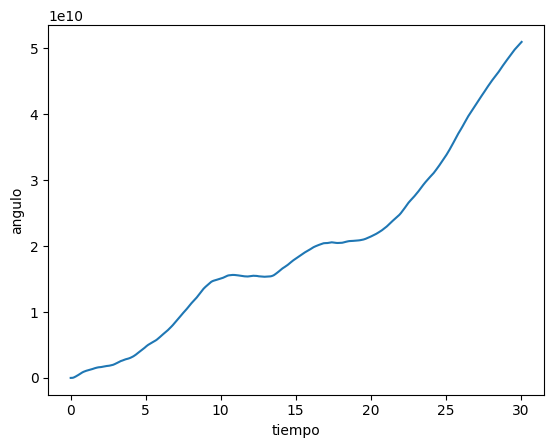

In [13]:
plt.plot(solution_A[0], [row[0] for row in solution_A[1]])
plt.xlabel('tiempo')
plt.ylabel('angulo')
plt.show()

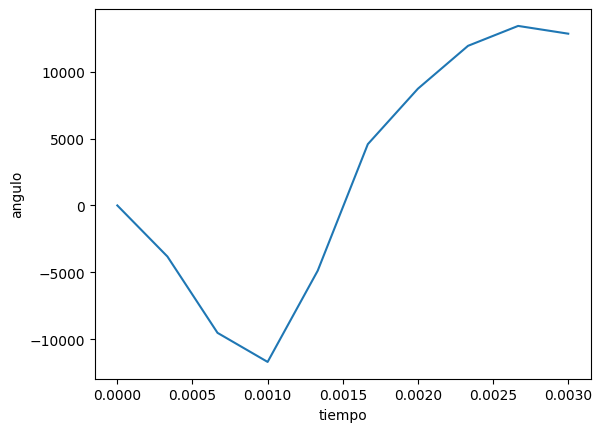

In [14]:
plt.plot(solution_A[0][0:10], [row[0] for row in solution_A[1]][0:10])
plt.xlabel('tiempo')
plt.ylabel('angulo')
plt.show()

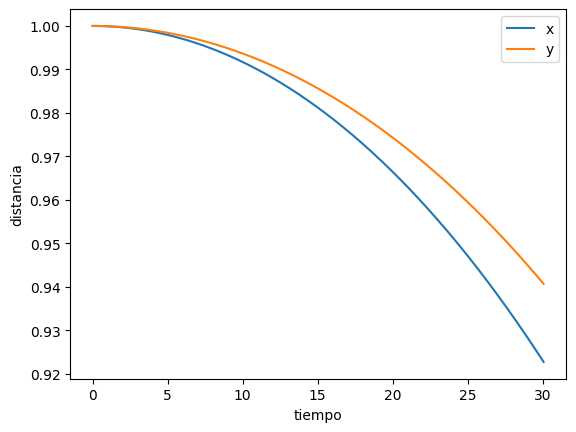

In [15]:
plt.plot(solution_F[0], [row[0] for row in solution_F[1]], label="x")
plt.plot(solution_F[0], [row[1] for row in solution_F[1]], label="y")
plt.xlabel('tiempo')
plt.ylabel('distancia')
plt.legend()
plt.show()

-------------------------

Considerando la masa del protón más el electrón en el dipolo: $m = 1.67271\times 10^{-27} \; Kg$

(explota el cálculo del ángulo)

In [24]:
from scipy import integrate  # to calculate the partial derivatives
import numdifftools as nd    # to calculate the gradient


pos = np.array([0, 0, 0])    # point charge position (electric field generator)
Q = 15e-5                    # [Coulombs] = [C], charge of the point charge
k = 8.99e9                   # [N m^2 / C^2] = [(Kg m^3)/(s^4 A^2)], coulomb constant


def field_due_point_charge(r): #position where want the E field
    x, y, z = r
    
    return np.array([
        k * (x - pos[0]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # x coord
        k * (y - pos[1]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2)), # y coord
        k * (z - pos[2]) * Q / 
                (((x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2)**(3/2))  # z coord
    ])


def moment_inertia(m, l): # mass, diameter
    # I consider it as a sphere, but it can be a rod or whatever
    return 2 * m * (np.linalg.norm(l)/2)**2 / 5


def dipole_angle(t, theta):
    
    # components
    x, v = theta    # x: theta, v: omega
    E = field_due_point_charge(pos_dip) # should change when updating displacement (to do...)
    tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(x)
    a = -tau / I if I != 0 else 0  # tau is negative by the right hand rule, it goes into the page
    
    return np.array([v, a])  # velocity (omega, first derivative) and acceleration (alpha, second derivative)


def dipole_displacement(t, r):
        
        # components
        x, y, z, vx, vy, vz = r
        dE_r = dE([x, y, z])
        
        ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        ay = ( 1/m ) * (p[0] * dE_r[1][0] + p[1] * dE_r[1][1] + p[2] * dE_r[1][2])
        az = ( 1/m ) * (p[0] * dE_r[2][0] + p[1] * dE_r[2][1] + p[2] * dE_r[2][2])
        
        return np.array([vx, vy, vz, ax, ay, az])


# I'm thinking of a virus, that's why the mass, the diameter and the moment of inertia are chosen that way
    
pos_dip = np.array([1, 1, 0])  # dipole position (a una micra en 'x' y en 'y')
ele = 140e-9                   # [meters], distance between the two charges (virus diameter)
m = 1.67271e-27                # [Kg], dipole mass (virus mass), (works with m=1e-7)
q1 = 1.6e-19                   # [Coulombs], charge of each extreme of the dipole (to calculate dipole moment)
t_end = 30                     # [seconds], final time
t_start = 0                    # [seconds], initial time
fps = 30                       # frames per second, to later create an animation
theta = np.pi/3                # initial angle
omega = 0.0                    # initial angular velocity


# It works with this value, but I actually want the ones listed above
#m = 1e-7



# assuming that the center of ele is at the origin
r_pos = np.array([(ele/2)*np.cos(theta), (ele/2)*np.sin(theta), 0])    # positive charge
r_neg = np.array([-(ele/2)*np.cos(theta), -(ele/2)*np.sin(theta), 0])  # negative charge

l = r_pos - r_neg              # vector of the distance of the two charges
p = l * q1                     # dipole moment

I = moment_inertia(m, l)       # moment of inertia

E = field_due_point_charge(pos_dip)  # [V/m], electric field due to a point charge, at position 'pos_dip'

dE = nd.Gradient(field_due_point_charge) # gradient or jacobian, it is the same since it is a vector function
                                         # necessary for displacement force

# calculos para ver como son los numeros y sus ordenes de magnitud (al menos al inicio del desma)

tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(theta)
dE_r = dE(pos_dip)
ax = ( 1/m ) * (p[0] * dE_r[0][0] + p[1] * dE_r[0][1] + p[2] * dE_r[0][2])
        
print("r_pos =", r_pos)
print("r_neg =", r_neg)
print("l =", l)
print("p =", p)
print("I =", I)
print("E =", E)
print('tau =', tau)
print("alpha =", tau / I)
print("a_x =", ax)
print("------------")
print("iterations =", t_end * fps + 2)
print("[theta, omega] = ", [theta, omega])


# solution_A = integrate.solve_ivp(dipole_angle, 
#                                   [t_start, t_end], 
#                                   [theta, omega],
#                                   method='Radau',#'RK45', # con el RK45 la gráfica de la oscilación se ve mas fea
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2), # si no lo indico me da 257 puntos
#                                   #t_eval=np.linspace(t_start, t_end, 902),  # pero quiero 902 puntos evaluados
#                                   args=(I, p),
#                                   vectorized=True
#                                   #rtol=1e-9, atol=1e-12
#                                  )

solution_A = rk45(dipole_angle, 0.0, np.array([theta, omega]), (t_end * fps + 2)*100, 1/(fps*100))


# I also want to calculate the displacement, but here it does not calculate 
# any movement, it always stays in the same position
# with some numbers if it calculates displacement in x and y
# solution_F = integrate.solve_ivp(dipole_displacement, 
#                                   [t_start, t_end], 
#                                   [pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0],
#                                   method='Radau', 
#                                   t_eval=np.linspace(t_start, t_end, t_end * fps + 2),
#                                   args=(p,)
#                                  )

solution_F = rk45(dipole_displacement, 0.0, np.array([pos_dip[0], pos_dip[1], pos_dip[2], 0, 0, 0]), t_end * fps + 2, 1/fps)



r_pos = [3.50000000e-08 6.06217783e-08 0.00000000e+00]
r_neg = [-3.50000000e-08 -6.06217783e-08  0.00000000e+00]
l = [7.00000000e-08 1.21243557e-07 0.00000000e+00]
p = [1.1200000e-26 1.9398969e-26 0.0000000e+00]
I = 3.278511600000001e-42
E = [476766.74721503 476766.74721503      0.        ]
tau = 1.307975487843713e-20
alpha = 3.9895405215089453e+21
a_x = -9889980.236028157
------------
iterations = 902
[theta, omega] =  [1.0471975511965976, 0.0]


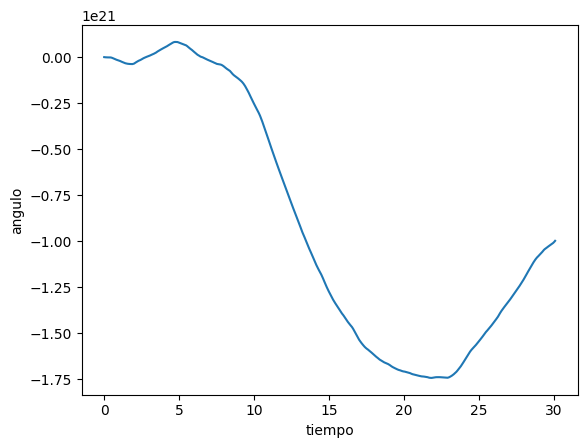

In [25]:
plt.plot(solution_A[0], [row[0] for row in solution_A[1]])
plt.xlabel('tiempo')
plt.ylabel('angulo')
plt.show()

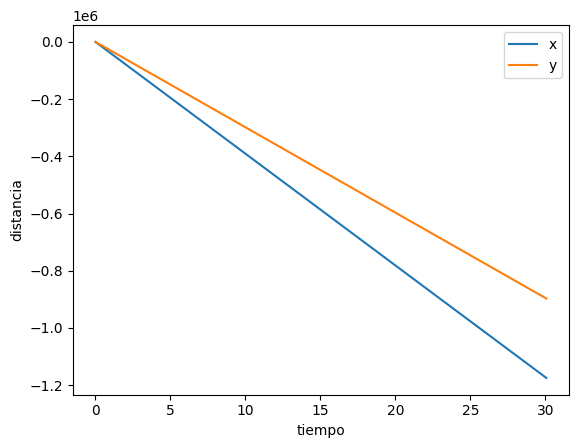

In [26]:
plt.plot(solution_F[0], [row[0] for row in solution_F[1]], label="x")
plt.plot(solution_F[0], [row[1] for row in solution_F[1]], label="y")
plt.xlabel('tiempo')
plt.ylabel('distancia')
plt.legend()
plt.show()